In [1]:
#imports

import tarfile
import pandas as pd
import pyarrow.parquet as pq
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import random
pd.set_option('display.max_columns', None)

In [2]:
%%time

# dataset10 = pq.ParquetDataset("bigd/M148/hitdata7days/visitday=10/")
dataset_all = pq.ParquetDataset("bigd/M148/hitdata7days")

CPU times: user 891 ms, sys: 50 ms, total: 941 ms
Wall time: 4.5 s


In [3]:
%%time

columns = ['visitnumber', 'myaccountengagement', 'calculatorengagement', #numeric
            'service', 
            'emailsubscriptionremove', # change to boolean 
            'refinementattribute2', # maximize, change to boolean
            'prop29', # type of customer
            'prop33', # Customer Lifestage Segment
            'prop44', # Customer Attribute Tagging
            'prop50', # error message change to boolean
            'state', 'color', 'connectiontype',
            'geocountry', 
            'newvisit', 
            'monthlyvisitor', 
            'productfindingmethods',
            'evar16', # attempted promocode                  
            'evar28', # Marketing Segment Name
            'clickactiontype',
            'clickcontexttype', # boolean
            'clicktag',
            'devicetype',
            'evar83', # behavior score
            'evar89',
            'ordernumber',
            'visitid'] 
data_all = dataset_all.read(columns=columns).combine_chunks()

CPU times: user 52.5 s, sys: 9.63 s, total: 1min 2s
Wall time: 1min 1s


In [4]:
%%time

df = data_all.to_pandas()
df.head()

CPU times: user 1min 52s, sys: 23 s, total: 2min 15s
Wall time: 5min 52s


,visitnumber,myaccountengagement,calculatorengagement,service,emailsubscriptionremove,refinementattribute2,prop29,prop33,prop44,prop50,state,color,connectiontype,geocountry,newvisit,monthlyvisitor,productfindingmethods,evar16,evar28,clickactiontype,clickcontexttype,clicktag,devicetype,evar83,evar89,ordernumber,visitid,visitday
0,6,None,None,pe,None,None,None,None,None,None,None,1,2,usa,0,0,None,None,None,0,0,None,Mobile,None,None,None,189763922254746751413200407250696891446,10
1,1,54,4.8,ss,https://www.fingerhut.com/product/NRWP5?cat=10,None,Mature,Mature,Fetti,None,MS,1,2,usa,0,0,None,None,5_Fragile_Mature,0,0,None,Mobile,529,None,None,224586517001559320985673092461365783711,10
2,10,None,None,pe,https://www.fingerhut.com/checkout/index,None,Prospect,None,FreshStart,None,None,2,2,usa,0,0,None,None,None,0,0,None,Tablet,None,None,None,8130213804068902160860345088231219715210,10
3,2,None,None,pe,https://www.fingerhut.com/checkout/index,None,Mature,None,Fetti,None,None,2,2,usa,0,0,None,None,6_Missing_Mature,3,1,SUBMIT,Desktop,507,None,None,590912592049203187912453158393064821062,10
4,2,61,None,ss,https://www.fingerhut.com/,None,Emerging,Emerging,Fetti,None,CA,1,2,usa,0,0,None,None,1_Valuable_Other,0,1,A,Mobile,455,None,None,538021183841242432152115917402238466902,10


## Sampling

In [5]:
# look at how many rows are in the dataframe
print(len(df))

42730149


In [28]:
%%time

# randomly sample 1% of original dataset
random.seed(1126)
row_index = random.sample(range(42730149), 400000)
df = df.loc[row_index]
df.head()

CPU times: user 6.36 s, sys: 36 s, total: 42.4 s
Wall time: 41min 21s


,visitnumber,myaccountengagement,calculatorengagement,service,emailsubscriptionremove,refinementattribute2,prop29,prop33,prop44,prop50,state,color,connectiontype,geocountry,newvisit,monthlyvisitor,productfindingmethods,evar16,evar28,clickactiontype,clickcontexttype,clicktag,devicetype,evar83,evar89,ordernumber,visitid,visitday
17892595,4,None,None,pe,https://www.fingerhut.com/search?search-type=a...,None,New,None,Fetti,None,None,2,2,usa,0,0,None,None,None,0,1,A,Desktop,None,None,None,211730391438924163378248714834152719704,12
4302256,1,None,None,pe,https://www.fingerhut.com/search?wid=39r5g7lr&...,None,New,None,FreshStart,None,None,1,2,usa,0,0,None,None,6_Missing_Other,0,1,A,Tablet,414,None,None,659098639537977369452357399704072965161,10
16191571,1,None,None,pe,https://www.fingerhut.com/search?search-type=a...,None,None,None,Fetti,None,None,2,4,usa,0,0,None,None,None,0,0,None,Mobile,None,None,None,169702092873272870017622178723318472481,12
1373534,4,None,None,pe,https://www.fingerhut.com/search/Shoes/2021.ut...,None,Mature,None,Fetti,None,None,1,2,usa,0,0,None,None,3_Expandable_Mature,3,1,SUBMIT,Mobile,518,None,None,901099401501437293927249989210107920634,10
18646137,31,68,0,ss,https://www.fingerhut.com/product/NRQYD.uts?CT...,None,New,New,Fetti,None,LA,2,2,usa,0,0,None,None,6_Missing_Other,0,0,None,Tablet,445,None,None,6880669734956299280455788695857270358631,12


In [29]:
# look at new dataframe rows
print(len(df))

400000


In [41]:
# export sampled dataframe

df.to_csv('sampled_data.csv')

## Directly load in sampled dataset

In [4]:
df = pd.read_csv('sampled_data.csv', index_col=0)
df.head()

,visitnumber,myaccountengagement,calculatorengagement,service,emailsubscriptionremove,refinementattribute2,prop29,prop33,prop44,prop50,state,color,connectiontype,geocountry,newvisit,monthlyvisitor,productfindingmethods,evar16,evar28,clickactiontype,clickcontexttype,clicktag,devicetype,evar83,evar89,ordernumber,visitid,visitday
17892595,4.0,NaN,NaN,pe,https://www.fingerhut.com/search?search-type=a...,NaN,New,NaN,Fetti,NaN,NaN,2,2,usa,0,0,NaN,NaN,NaN,0,1,A,Desktop,NaN,NaN,NaN,211730391438924163378248714834152719704,12
4302256,1.0,NaN,NaN,pe,https://www.fingerhut.com/search?wid=39r5g7lr&...,NaN,New,NaN,FreshStart,NaN,NaN,1,2,usa,0,0,NaN,NaN,6_Missing_Other,0,1,A,Tablet,414.0,NaN,NaN,659098639537977369452357399704072965161,10
16191571,1.0,NaN,NaN,pe,https://www.fingerhut.com/search?search-type=a...,NaN,NaN,NaN,Fetti,NaN,NaN,2,4,usa,0,0,NaN,NaN,NaN,0,0,NaN,Mobile,NaN,NaN,NaN,169702092873272870017622178723318472481,12
1373534,4.0,NaN,NaN,pe,https://www.fingerhut.com/search/Shoes/2021.ut...,NaN,Mature,NaN,Fetti,NaN,NaN,1,2,usa,0,0,NaN,NaN,3_Expandable_Mature,3,1,SUBMIT,Mobile,518.0,NaN,NaN,901099401501437293927249989210107920634,10
18646137,31.0,68.0,0.0,ss,https://www.fingerhut.com/product/NRQYD.uts?CT...,NaN,New,New,Fetti,NaN,LA,2,2,usa,0,0,NaN,NaN,6_Missing_Other,0,0,NaN,Tablet,445.0,NaN,NaN,6880669734956299280455788695857270358631,12


## Select Columns

In [7]:
%%time

# remove columns only contain one value (ex. None)
df = df.dropna(thresh=2, axis=1)

CPU times: user 3min 53s, sys: 27.9 s, total: 4min 21s
Wall time: 8min 49s


In [ ]:
%%time

# replace none with NA
df = df.replace(['None'],np.nan)
df = df.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
df_clean = df

## Column Modification

In [6]:
%%time

df_clean[['visitnumber']]=df_clean[['visitnumber']].apply(pd.to_numeric)

NameError: name 'df_clean' is not defined

In [9]:
%%time

## Try!!!!
dff = df_clean.copy()
dff = dff.groupby('visitid').fillna(method = 'ffill')
dff['visitid'] = df_clean['visitid']

CPU times: user 16min 13s, sys: 54.7 s, total: 17min 8s
Wall time: 17min 9s


In [10]:
%%time

dff = dff.groupby('visitid').fillna(method = "bfill")

CPU times: user 16min 20s, sys: 24.9 s, total: 16min 45s
Wall time: 16min 45s


In [12]:
dff['visitid'] = df_clean['visitid']

In [13]:
%%time

df_clean = dff.copy()
df_clean[['remove_email']] = df_clean[['emailsubscriptionremove']].notnull()
df_clean[['close_look']] = df_clean[['refinementattribute2']].notnull()
df_clean[['error_message']] = df_clean[['prop50']].notnull()

df_clean[['clicktag']] = df_clean[['clicktag']].fillna('Noclick')
df_clean[['prop29']] = df_clean[['prop29']].fillna('unknown')
df_clean[['evar28']] = df_clean[['evar28']].fillna('unknown')
df_clean[['prop33']] = df_clean[['prop33']].fillna('unknown')
df_clean['productfindingmethods'] = df_clean['productfindingmethods'].fillna('other')
df_clean[['evar89']] = df_clean[['evar89']].fillna('unknown')

df_clean[['attempt_promo']] = df_clean[['evar16']].notnull()
df_clean[['prop44']] = df_clean[['prop44']].fillna('Others')

df_clean[['made_purchase']] = df_clean[['ordernumber']].notnull()

CPU times: user 1.75 s, sys: 3.79 ms, total: 1.76 s
Wall time: 1.76 s


## Drop Columns

In [14]:
df_clean = df_clean.drop(['ordernumber', 'emailsubscriptionremove', 'refinementattribute2',
                          'prop50', 'visitid', 'visitnumber', 'evar16'],
                          axis=1)

In [15]:
df_clean.isnull().mean().round(10).mul(100).sort_values(ascending=False)

calculatorengagement     85.20075
state                    61.62225
myaccountengagement      52.09100
evar83                   43.83150
clickactiontype           0.00000
attempt_promo             0.00000
error_message             0.00000
close_look                0.00000
remove_email              0.00000
visitday                  0.00000
evar89                    0.00000
devicetype                0.00000
clicktag                  0.00000
clickcontexttype          0.00000
evar28                    0.00000
productfindingmethods     0.00000
monthlyvisitor            0.00000
newvisit                  0.00000
geocountry                0.00000
connectiontype            0.00000
color                     0.00000
prop44                    0.00000
prop33                    0.00000
prop29                    0.00000
service                   0.00000
made_purchase             0.00000
dtype: float64

In [16]:
%%time

corr_matrix = df_clean.corr().abs()

high_corr_var=np.where(corr_matrix>0.7)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

CPU times: user 383 ms, sys: 0 ns, total: 383 ms
Wall time: 381 ms


In [17]:
high_corr_var

[]

In [18]:
# export dataframe

df_clean.to_csv('df_clean_final.csv')

## Resample data (bootstrap)

In [39]:
df_clean = pd.read_csv('df_clean_final.csv', index_col=0)
df_clean.head()

,myaccountengagement,calculatorengagement,service,prop29,prop33,prop44,state,color,connectiontype,geocountry,newvisit,monthlyvisitor,productfindingmethods,evar28,clickactiontype,clickcontexttype,clicktag,devicetype,evar83,evar89,visitday,remove_email,close_look,error_message,attempt_promo,made_purchase
17892595,65.0,0.0,pe,New,New,Fetti,NC,2,2,usa,0,0,other,unknown,0,1,A,Desktop,NaN,unknown,12,True,False,False,False,False
4302256,NaN,NaN,pe,New,unknown,FreshStart,NaN,1,2,usa,0,0,other,6_Missing_Other,0,1,A,Tablet,414.0,unknown,10,True,False,False,False,False
16191571,NaN,NaN,pe,unknown,unknown,Fetti,NaN,2,4,usa,0,0,other,unknown,0,0,A,Mobile,NaN,unknown,12,True,False,False,False,False
1373534,66.0,NaN,pe,Mature,unknown,Fetti,NaN,1,2,usa,0,0,other,3_Expandable_Mature,3,1,SUBMIT,Mobile,518.0,unknown,10,True,False,False,False,False
18646137,68.0,0.0,ss,New,New,Fetti,LA,2,2,usa,0,0,other,6_Missing_Other,0,0,Noclick,Tablet,445.0,unknown,12,True,False,False,False,False


In [40]:
%%time

df_purchase = df_clean[df_clean['made_purchase']==1]
df_not_purchase = df_clean[df_clean['made_purchase']==0]

df_purchase_sample= df_purchase.sample(200000, random_state = 2001, replace=True)
df_not_purchase_sample = df_not_purchase.sample(200000, random_state = 2001, replace=True)
df_sample = pd.concat([df_purchase_sample, df_not_purchase_sample])

CPU times: user 239 ms, sys: 0 ns, total: 239 ms
Wall time: 239 ms


In [24]:
df_clean = df_sample.copy()

In [25]:
# export dataframe

df_clean.to_csv('df_clean_sampled.csv')

## Gradient Boosting Classifier

In [27]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import HistGradientBoostingClassifier

In [28]:
%%time

for column in df_clean.columns:
    le = LabelEncoder()
    labels = le.fit_transform(df_clean[column])
    df_clean[column] = labels

CPU times: user 2.08 s, sys: 19.8 ms, total: 2.1 s
Wall time: 2.1 s


In [29]:
# Split the data into features (X) and target (y)
X = df_clean.drop(['made_purchase'], axis=1)
y = df_clean['made_purchase']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
%%time

clf = HistGradientBoostingClassifier().fit(X, y)
clf.fit(X_train, y_train)

CPU times: user 1min 31s, sys: 3.19 s, total: 1min 34s
Wall time: 8.72 s


HistGradientBoostingClassifier()

In [31]:
clf.score(X_test, y_test)

0.9833

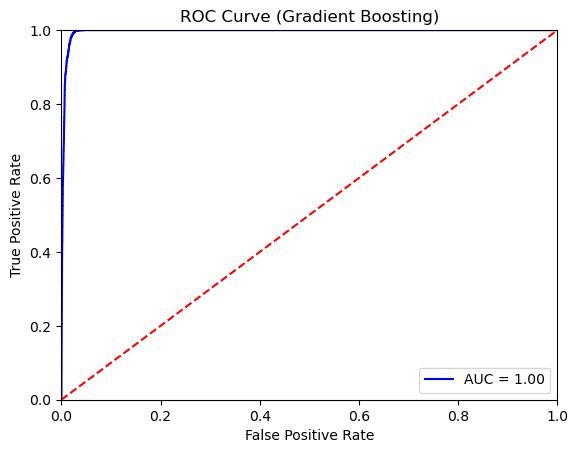

In [32]:
# ROC curve

probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC Curve (Gradient Boosting)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## XGBoost

In [36]:
import xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

ModuleNotFoundError: No module named 'xgboost'

In [39]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [40]:
xgb_model.score(X_test, y_test)

0.9658044366140787

In [44]:
from matplotlib import pyplot as plt

<Figure size 1440x576 with 0 Axes>

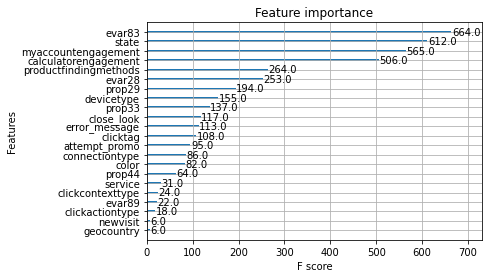

In [42]:
plt.figure(figsize=(20,8))
plot_importance(xgb_model)
plt.show()

## 

## Random Forest

In [48]:
# check if dataframe contains any NaN
df_clean.isnull().values.any()

False

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [54]:
X = df_clean.drop(['made_purchase'], axis=1)
y = df_clean['made_purchase']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
rf_model.fit(X_train, y_train)

/Users/amytang10/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', n_estimators=50, random_state=44)

In [56]:
rf_model.score(X_test, y_test)

0.9739462374202504

In [61]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

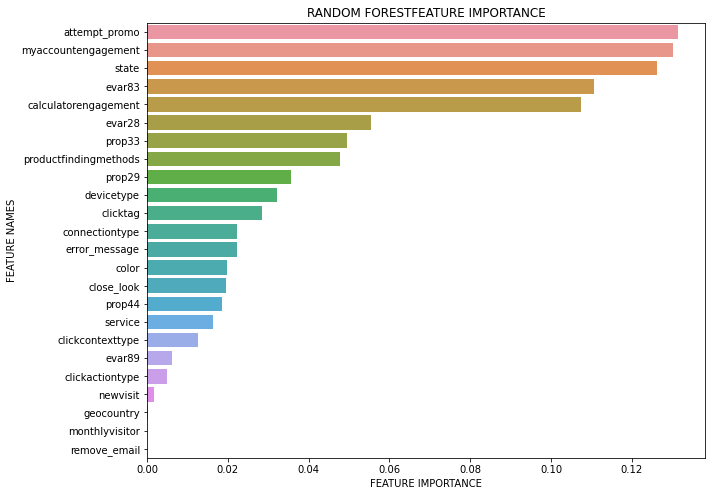

In [65]:
plot_feature_importance(rf_model.feature_importances_, X.columns, 'RANDOM FOREST')

In [68]:
y_preds = rf_model.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[31791,   415],
       [  561,  4694]])

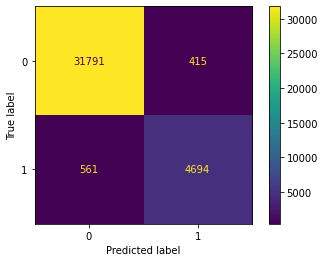

In [74]:
cm = confusion_matrix(y_test, y_preds, labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot()
plt.show()

## Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [36]:
logit_model = LogisticRegression(solver='liblinear', random_state=0)
logit_model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [37]:
logit_model.score(X_test, y_test)

0.8411548009930327

In [38]:
y_preds = logit_model.predict(X_test)

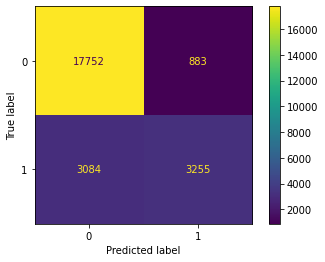

In [45]:
cm = confusion_matrix(y_test, y_preds, labels=logit_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logit_model.classes_)
disp.plot()
plt.show()

In [46]:
print(logit_model.coef_, logit_model.intercept_)

[[ 0.0305493   0.00324809 -0.11127001  0.04553727 -0.13947184 -0.34795625
  -0.01718877 -0.0410648  -0.20946622 -0.10881446 -1.00230069 -0.09169133
  -0.18237547  0.01173829  0.15517694 -0.03038335  0.05322781 -0.29744498
   0.00428084 -0.21613627  0.91657468 -0.23322044  0.15066269  2.8196079 ]] [-0.73295857]


## Support Vector Machine (took too long to run so will not keep this)

In [83]:
from sklearn import svm

In [ ]:
## took too long to run
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

In [ ]:
svm_model.score(X_test, y_test)